In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
df = pd.read_csv(r"C:\Users\Pratham Sankhala\Desktop\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.shape

(891, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

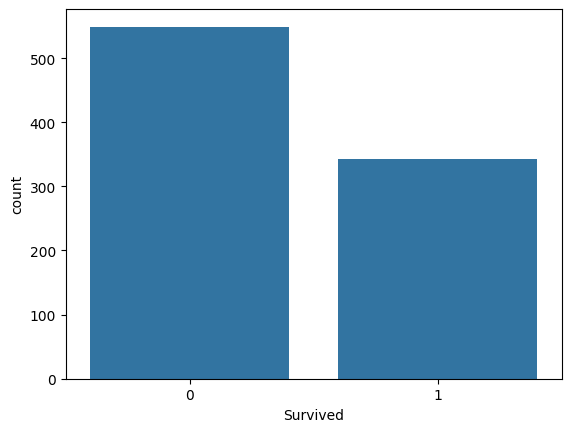

In [54]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

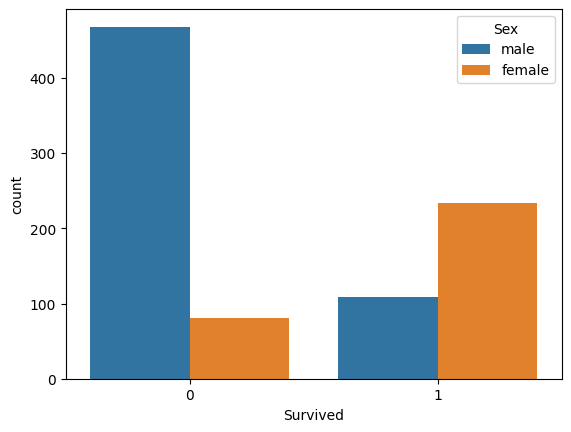

In [55]:
sns.countplot(x='Survived',hue = "Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

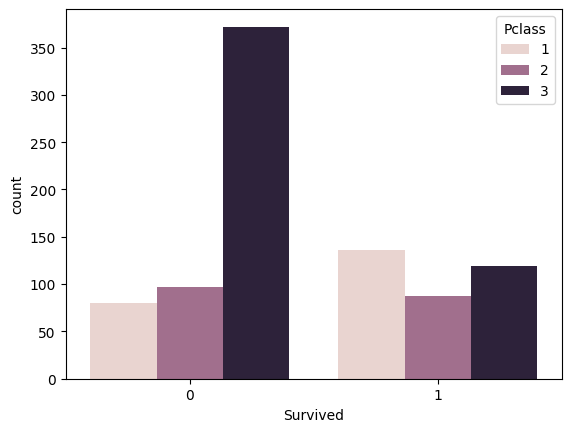

In [56]:
sns.countplot (x ="Survived", hue = "Pclass", data = df)

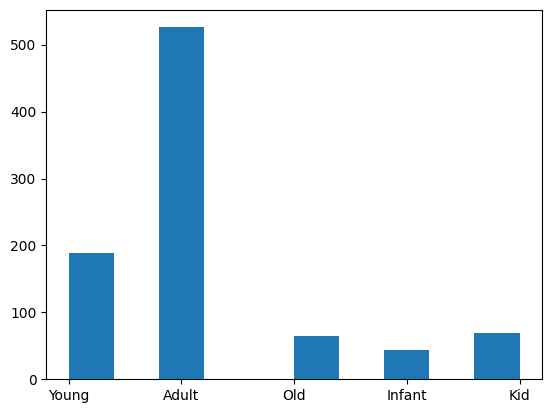

In [90]:
df ["Age"]. hist ()
plt.grid(False)

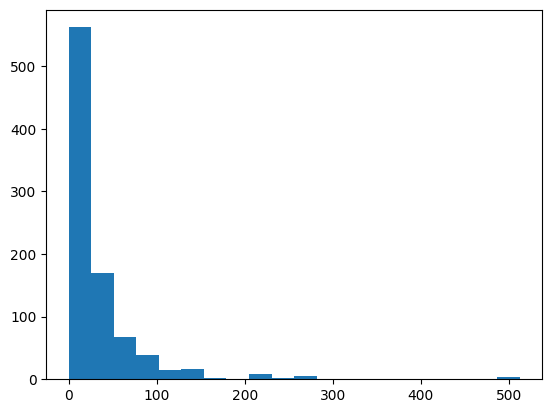

In [61]:
df ["Fare"].hist (bins = 20)
plt.grid(False)

In [62]:
df.isnull().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
df['Age'] = pd.cut(df['Age'], bins = bins, labels=labels)

In [64]:
pd.DataFrame(df['Age'].value_counts())

,count
Age,
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [65]:
df['Age'].mode()[0]

'Adult'

In [66]:
df = df.fillna({'Age' : df['Age'].mode()[0]})

In [67]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
print(f"How many 'S' on embarked column : {df[df['Embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {df[df['Embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {df[df['Embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [69]:
df = df.fillna({'Embarked' : 'S'})

In [70]:
clean_df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [71]:
clean_df.isnull().sum ()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [72]:
clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Young,1,0,7.2500,S
1,1,1,female,Adult,1,0,71.2833,C
2,1,3,female,Adult,0,0,7.9250,S
3,1,1,female,Adult,1,0,53.1000,S
4,0,3,male,Adult,0,0,8.0500,S


In [73]:
dummies = ['Embarked', 'Sex','Age']
dummy_data = pd.get_dummies(clean_df[dummies])

In [74]:
new_df = pd.concat([clean_df, dummy_data], axis = 1)
new_df.drop(dummies, axis=1, inplace=True)

In [75]:
new_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old
0,0,3,1,0,7.2500,False,False,True,False,True,False,False,True,False,False
1,1,1,1,0,71.2833,True,False,False,True,False,False,False,False,True,False
2,1,3,0,0,7.9250,False,False,True,True,False,False,False,False,True,False
3,1,1,1,0,53.1000,False,False,True,True,False,False,False,False,True,False
4,0,3,0,0,8.0500,False,False,True,False,True,False,False,False,True,False


In [76]:
columns_to_convert = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male','Age_Infant','Age_Kid','Age_Young','Age_Adult','Age_Old']
new_df[columns_to_convert] = new_df[columns_to_convert].astype('uint8')

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
 10  Age_Infant  891 non-null    uint8  
 11  Age_Kid     891 non-null    uint8  
 12  Age_Young   891 non-null    uint8  
 13  Age_Adult   891 non-null    uint8  
 14  Age_Old     891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(10)
memory usage: 43.6 KB


In [78]:
Y= new_df ['Survived']
X= new_df.drop (['Survived'], axis = 1 )

In [79]:
X.head()

,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old
0,3,1,0,7.2500,0,0,1,0,1,0,0,1,0,0
1,1,1,0,71.2833,1,0,0,1,0,0,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0,0,0,0,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,0,0,1,0
4,3,0,0,8.0500,0,0,1,0,1,0,0,0,1,0


In [80]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (712, 14) (712,)
Test set: (179, 14) (179,)


In [82]:
model = LogisticRegression (solver = 'liblinear')

In [83]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [84]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [85]:
jaccard_score(Y_test, y_pred,pos_label=0)

0.785234899328859

In [86]:
accuracy_score (Y_test, y_pred)

0.8212290502793296

In [87]:
confusion_matrix(y_pred, Y_test)

array([[117,  30],
       [  2,  30]], dtype=int64)